# Can you predict which NBA players will make the "All-Star" team?

## Part one: Clean the data

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, roc_auc_score,classification_report


#### Load 'player_data.csv' 

In [2]:
player_data = pd.read_csv("player_data.csv")

In [3]:
player_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0


In [4]:
player_data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'PER', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'WS', 'BPM',
       'VORP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS'],
      dtype='object')

#### Drop the first column

In [5]:
player_data.drop("Unnamed: 0", axis=1, inplace=True)
player_data.head()

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0


#### Remove null values from "Players" column

In [6]:
player_data.isna().sum()

Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
PER        590
TS%        153
ORB%      3899
DRB%      3899
TRB%      3120
AST%      2136
STL%      3899
BLK%      3899
TOV%      5109
WS         106
BPM       3894
VORP      3894
FG%        166
3P%       9275
2P%        195
eFG%       166
FT%        925
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PTS         67
dtype: int64

In [7]:
player_data = player_data.dropna(axis=0, subset=["Player"], how="all")

In [8]:
player_data.isna().sum()

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
PER        523
TS%         86
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
WS          39
BPM       3827
VORP      3827
FG%         99
3P%       9208
2P%        128
eFG%        99
FT%        858
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PTS          0
dtype: int64

#### Replace null values with 0's in the '3P%' column

In [9]:
player_data["3P%"].fillna(value = 0,inplace=True)

In [10]:
player_data.isnull().sum()

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
PER        523
TS%         86
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
WS          39
BPM       3827
VORP      3827
FG%         99
3P%          0
2P%        128
eFG%        99
FT%        858
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PTS          0
dtype: int64

#### Remove rows for players who started their careers before the 1980 season

To answer this question, we have to be careful because we have players that started their career before 1980 and still played after 1980. This is why we need to remove them and avoid overlapping. For that reason, we will have to  first create a new dataframe in which we will filter only the players who played before 1980.


In [11]:
#We are now creating a new dataframe containing only the players who played before 1980.
player_data_filtered = player_data[(player_data.Year < 1980)]
#Here we are displaying the bottom of our table by using .tail() to find a player who played 1 or 2 years 
#before the threshold given (1980) .
player_data_filtered.tail(10)

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5716,1979.0,Jamaal Wilkes*,SF,25.0,LAL,82.0,16.4,0.544,6.5,15.7,...,0.0,0.504,0.504,0.751,609.0,227.0,134.0,27.0,224.0,1524.0
5717,1979.0,Earl Williams,C,27.0,BOS,20.0,15.3,0.457,16.5,26.2,...,0.0,0.439,0.439,0.583,105.0,12.0,12.0,9.0,20.0,122.0
5718,1979.0,Freeman Williams,SG,22.0,SDC,72.0,16.1,0.514,4.3,4.5,...,0.0,0.490,0.490,0.776,98.0,83.0,42.0,2.0,99.0,746.0
5719,1979.0,Gus Williams,PG,25.0,SEA,76.0,21.1,0.534,5.1,6.2,...,0.0,0.495,0.495,0.775,245.0,307.0,158.0,29.0,190.0,1457.0
5720,1979.0,Nate Williams,SG,28.0,GSW,81.0,14.7,0.542,5.6,11.6,...,0.0,0.501,0.501,0.872,207.0,61.0,55.0,5.0,93.0,670.0
5721,1979.0,Ray Williams,PG,24.0,NYK,81.0,17.7,0.502,4.7,8.5,...,0.0,0.457,0.457,0.802,291.0,504.0,128.0,19.0,285.0,1401.0
5722,1979.0,John Williamson,SG,27.0,NJN,74.0,16.4,0.527,2.2,6.4,...,0.0,0.465,0.465,0.854,196.0,255.0,89.0,12.0,233.0,1643.0
5723,1979.0,Rick Wilson,SG,22.0,ATL,61.0,9.7,0.430,3.5,10.7,...,0.0,0.411,0.411,0.545,76.0,72.0,30.0,8.0,41.0,186.0
5724,1979.0,Brian Winters,SG,26.0,MIL,79.0,15.6,0.533,2.1,5.5,...,0.0,0.493,0.493,0.856,177.0,383.0,83.0,40.0,257.0,1561.0
5725,1979.0,Larry Wright,PG,24.0,WSB,73.0,13.7,0.511,3.0,5.6,...,0.0,0.469,0.469,0.744,140.0,298.0,69.0,13.0,119.0,677.0


Then, to follow our strategy, we look at the bottom of the table displayed previously and decide to continue our analyze using John Williamson.


In [12]:
#Here we are using John Williamson as filter in the original dataframe player_data.
player_data[(player_data.Player =="Jamaal Wilkes*")]

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
4361,1975.0,Jamaal Wilkes*,SF,21.0,GSW,82.0,15.3,0.473,7.8,18.2,...,0.000,0.442,0.442,0.734,671.0,183.0,107.0,22.0,NaN,1164.0
4636,1976.0,Jamaal Wilkes*,SF,22.0,GSW,82.0,16.8,0.499,6.9,18.3,...,0.000,0.463,0.463,0.772,720.0,167.0,102.0,31.0,NaN,1461.0
4987,1977.0,Jamaal Wilkes*,PF,23.0,GSW,76.0,16.8,0.523,6.0,16.7,...,0.000,0.478,0.478,0.797,578.0,211.0,127.0,16.0,NaN,1343.0
5365,1978.0,Jamaal Wilkes*,SF,24.0,LAL,51.0,16.1,0.475,8.0,17.7,...,0.000,0.440,0.440,0.716,380.0,182.0,77.0,22.0,107.0,660.0
5716,1979.0,Jamaal Wilkes*,SF,25.0,LAL,82.0,16.4,0.544,6.5,15.7,...,0.000,0.504,0.504,0.751,609.0,227.0,134.0,27.0,224.0,1524.0
6069,1980.0,Jamaal Wilkes*,SF,26.0,LAL,82.0,17.6,0.563,6.8,11.2,...,0.176,0.539,0.536,0.808,525.0,250.0,129.0,28.0,157.0,1644.0
6436,1981.0,Jamaal Wilkes*,SF,27.0,LAL,81.0,18.0,0.556,5.6,9.8,...,0.077,0.530,0.526,0.758,435.0,235.0,121.0,29.0,207.0,1827.0
6796,1982.0,Jamaal Wilkes*,SF,28.0,LAL,82.0,16.5,0.554,6.0,8.7,...,0.000,0.527,0.525,0.732,393.0,143.0,89.0,24.0,164.0,1734.0
7192,1983.0,Jamaal Wilkes*,SF,29.0,LAL,80.0,17.6,0.558,6.6,8.2,...,0.000,0.533,0.530,0.757,343.0,182.0,65.0,17.0,150.0,1571.0
7538,1984.0,Jamaal Wilkes*,SF,30.0,LAL,75.0,15.4,0.549,6.3,8.8,...,0.250,0.516,0.515,0.743,340.0,214.0,72.0,41.0,137.0,1294.0


In [13]:
player_data[(player_data.Player =="John Williamson")]

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
4995,1977.0,John Williamson,SG,25.0,TOT,72.0,15.9,0.501,1.6,6.3,...,0.000,0.459,0.459,0.787,193.0,201.0,107.0,13.0,NaN,1495.0
4996,1977.0,John Williamson,SG,25.0,NYN,42.0,15.8,0.490,1.6,7.1,...,0.000,0.445,0.445,0.789,119.0,90.0,59.0,6.0,NaN,875.0
4997,1977.0,John Williamson,SG,25.0,IND,30.0,16.0,0.518,1.6,5.3,...,0.000,0.480,0.480,0.784,74.0,111.0,48.0,7.0,NaN,620.0
5372,1978.0,John Williamson,SG,26.0,TOT,75.0,15.1,0.488,2.3,5.9,...,0.000,0.438,0.438,0.847,227.0,214.0,94.0,10.0,228.0,1777.0
5373,1978.0,John Williamson,SG,26.0,IND,42.0,12.0,0.464,2.2,5.9,...,0.000,0.421,0.421,0.832,120.0,132.0,47.0,0.0,127.0,804.0
5374,1978.0,John Williamson,SG,26.0,NJN,33.0,18.5,0.509,2.3,6.0,...,0.000,0.454,0.454,0.857,107.0,82.0,47.0,10.0,101.0,973.0
5722,1979.0,John Williamson,SG,27.0,NJN,74.0,16.4,0.527,2.2,6.4,...,0.000,0.465,0.465,0.854,196.0,255.0,89.0,12.0,233.0,1643.0
6075,1980.0,John Williamson,SG,28.0,TOT,58.0,13.5,0.481,2.8,4.6,...,0.314,0.445,0.446,0.841,99.0,126.0,36.0,19.0,92.0,845.0
6076,1980.0,John Williamson,SG,28.0,NJN,28.0,16.1,0.496,3.2,4.0,...,0.421,0.448,0.456,0.864,54.0,87.0,26.0,9.0,43.0,496.0
6077,1980.0,John Williamson,SG,28.0,WSB,30.0,10.2,0.462,2.3,5.2,...,0.188,0.441,0.434,0.800,45.0,39.0,10.0,10.0,49.0,349.0


As we can see, our thougts were right about Jamaal Wilkes* since he played from 1975 till 1986, and from 1977 till 1981 for John Williamson.
So now let's now build our function to only have the players who never played before 1980.

Now let's build a for loop that will iterate through all the players' names that have played before 1980, which means that are inside the "player_data_filtered" dataframe.

In [14]:
for x in player_data_filtered["Player"]:
    #Here we are removing all the players that played before and after 1980 from the main dataset 
    #to avoid overlaping and get the answer to the question proposed.
        player_data=player_data[player_data.Player != x]

In [15]:
player_data.head()

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.000,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0
5741,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.421,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0
5748,1980.0,Larry Bird*,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.406,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0
5753,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.000,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0
5759,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.400,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0


Now we have to check that all the rows containing Jamaal Wilkes  are removed to confirm that all the players who started their career before 1980 were removed as needed.

In [16]:
player_data[(player_data.Player =="Jamaal Wilkes*")]

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS


In [17]:
player_data[(player_data.Player =="John Williamson")]

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS


As expected, the function worked successfully in order to provide the answer needed. 

In [18]:
#Removing unecessary * from players
player_data["Player"] = player_data["Player"].str.strip("*")

In [19]:
player_data.head()

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.000,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0
5741,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.421,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0
5748,1980.0,Larry Bird,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.406,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0
5753,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.000,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0
5759,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.400,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0


#### Load in the 'all_star_appearances.pickle' file and use this data to create a column called 'all_star' that indicates whether or not a player made the All-Star team for a given year
- This file is a dictionary in which the keys are players who've made an All-Star team in their careers
- The values are all the years that the corresponding player made an All-Star team

#### Make sure this column is binary where 1 = Made All-Star team, and 0 = Did not make All-Star team

We first unpickle the "all_star_appearances.pickle" file:

In [20]:
with open("all_star_appearances.pickle","rb") as AS_dict:
     AS_dict = pickle.load(AS_dict)

In [21]:
#other method
# import pickle
# file = open("all_star_appearances.pickle", "rb")
# AS_dict = pickle.load(file)
# file.close()

In [22]:
#AS_dict

In [23]:
#Creating the column "all_star_years" by joining the dictionary given and our dataframe
player_data['all_star_years']=player_data['Player'].map(AS_dict)
player_data.head()

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star_years
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0,{}
5741,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0,{}
5748,1980.0,Larry Bird,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0,"{1984, 1985, 1986, 1987, 1988, 1990, 1991, 199..."
5753,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0,{}
5759,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0,{}


In [24]:
all_star= []
counter=0
#Checking if year matches players all star years
for i in player_data.Year:    
    if i in player_data.iloc[counter,-1]:
        all_star.append(1)
    else:
        all_star.append(0)
    
    counter+=1

In [25]:
all_star

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [26]:
#Adding all star list as all star column
#Resetting index so list will be added correctly
player_data.reset_index(drop=True, inplace=True)
player_data["all_star"]=pd.Series(all_star)

In [27]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17408 entries, 0 to 17407
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            17408 non-null  float64
 1   Player          17408 non-null  object 
 2   Pos             17408 non-null  object 
 3   Age             17408 non-null  float64
 4   Tm              17408 non-null  object 
 5   G               17408 non-null  float64
 6   PER             17403 non-null  float64
 7   TS%             17332 non-null  float64
 8   ORB%            17403 non-null  float64
 9   DRB%            17403 non-null  float64
 10  TRB%            17403 non-null  float64
 11  AST%            17403 non-null  float64
 12  STL%            17403 non-null  float64
 13  BLK%            17403 non-null  float64
 14  TOV%            17347 non-null  float64
 15  WS              17408 non-null  float64
 16  BPM             17408 non-null  float64
 17  VORP            17408 non-null 

As we can see in the table above, now we have now created our "all_star" column. 


In [28]:
player_data["all_star"]

0        0
1        0
2        1
3        0
4        0
        ..
17403    0
17404    0
17405    0
17406    0
17407    0
Name: all_star, Length: 17408, dtype: int64

As an NBA fan, the player I follow the most is Lebron James, so let's use him as a filter to see if our transformation was well executed.

In [29]:
player_data[(player_data.Player == "LeBron James")]

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star_years,all_star
9519,2004.0,LeBron James,SG,19.0,CLE,79.0,18.3,0.488,3.5,11.8,...,0.438,0.754,432.0,465.0,130.0,58.0,273.0,1654.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",0
10114,2005.0,LeBron James,SF,20.0,CLE,80.0,25.7,0.554,3.8,17.0,...,0.504,0.750,588.0,577.0,177.0,52.0,262.0,2175.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
10685,2006.0,LeBron James,SF,21.0,CLE,79.0,28.1,0.568,2.6,17.1,...,0.515,0.738,556.0,521.0,123.0,66.0,260.0,2478.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
11219,2007.0,LeBron James,SF,22.0,CLE,78.0,24.5,0.552,3.0,16.6,...,0.507,0.698,526.0,470.0,125.0,55.0,250.0,2132.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
11771,2008.0,LeBron James,SF,23.0,CLE,75.0,29.1,0.568,4.9,17.8,...,0.518,0.712,592.0,539.0,138.0,81.0,255.0,2250.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
12357,2009.0,LeBron James,SF,24.0,CLE,81.0,31.7,0.591,4.3,19.0,...,0.530,0.780,613.0,587.0,137.0,93.0,241.0,2304.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
12951,2010.0,LeBron James,SF,25.0,CLE,76.0,31.1,0.604,3.0,18.5,...,0.545,0.767,554.0,651.0,125.0,77.0,261.0,2258.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
13554,2011.0,LeBron James,SF,26.0,MIA,79.0,27.3,0.594,3.3,18.7,...,0.541,0.759,590.0,554.0,124.0,50.0,284.0,2111.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
14134,2012.0,LeBron James,SF,27.0,MIA,62.0,30.7,0.605,5.0,19.7,...,0.554,0.771,492.0,387.0,115.0,50.0,213.0,1683.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1
14668,2013.0,LeBron James,PF,28.0,MIA,76.0,31.6,0.640,4.4,20.8,...,0.603,0.753,610.0,551.0,129.0,67.0,226.0,2036.0,"{2016, 2005, 2006, 2007, 2008, 2009, 2010, 201...",1


The operation was a success as we notice, the "all_star" column is binary.

As mentioned previously, since we have to  predict which basketball players in the NBA make the ‘All-Star’ team in any given year, we can assume that the "all_star_years" column is irrelevant for our case so we drop it.

In [30]:
player_data.drop(columns="all_star_years",inplace=True)

In [31]:
#Checking it was done successfully
player_data.head()

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star
0,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0,0
1,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0,0
2,1980.0,Larry Bird,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0,1
3,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0,0
4,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0,0


## Part 2: Exploratory data analysis

#### Generate descriptive stats for the features

In [32]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17408 entries, 0 to 17407
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      17408 non-null  float64
 1   Player    17408 non-null  object 
 2   Pos       17408 non-null  object 
 3   Age       17408 non-null  float64
 4   Tm        17408 non-null  object 
 5   G         17408 non-null  float64
 6   PER       17403 non-null  float64
 7   TS%       17332 non-null  float64
 8   ORB%      17403 non-null  float64
 9   DRB%      17403 non-null  float64
 10  TRB%      17403 non-null  float64
 11  AST%      17403 non-null  float64
 12  STL%      17403 non-null  float64
 13  BLK%      17403 non-null  float64
 14  TOV%      17347 non-null  float64
 15  WS        17408 non-null  float64
 16  BPM       17408 non-null  float64
 17  VORP      17408 non-null  float64
 18  FG%       17320 non-null  float64
 19  3P%       17408 non-null  float64
 20  2P%       17292 non-null  fl

In [33]:
player_data.describe()

,Year,Age,G,PER,TS%,ORB%,DRB%,TRB%,AST%,STL%,...,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star
count,17408.000000,17408.000000,17408.000000,17403.000000,17332.000000,17403.000000,17403.000000,17403.000000,17403.000000,17403.000000,...,17292.000000,17320.000000,16684.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000
mean,2001.659926,26.641716,48.921473,12.329667,0.502936,6.147561,13.821732,9.985600,13.016181,1.654301,...,0.456072,0.463653,0.719077,199.330710,106.821691,37.808709,23.547507,69.885627,470.834501,0.046530
std,9.866835,3.969742,26.677348,6.306843,0.096376,5.048217,6.629142,5.093101,9.669535,1.040907,...,0.102074,0.100365,0.148665,199.955646,135.937581,37.366733,35.807557,65.117120,470.668694,0.210637
min,1980.000000,18.000000,1.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,24.000000,25.000000,9.600000,0.472000,2.500000,9.000000,6.000000,6.200000,1.100000,...,0.421000,0.432000,0.654000,44.000000,15.000000,8.000000,3.000000,17.000000,88.000000,0.000000
50%,2002.000000,26.000000,53.000000,12.600000,0.516000,5.200000,12.800000,9.200000,10.200000,1.500000,...,0.466000,0.475000,0.746000,140.000000,58.000000,27.000000,11.000000,52.000000,323.000000,0.000000
75%,2010.000000,29.000000,75.000000,15.500000,0.551000,9.000000,18.100000,13.400000,17.800000,2.100000,...,0.502000,0.511000,0.812000,288.000000,144.000000,57.000000,29.000000,106.000000,726.000000,0.000000
max,2017.000000,44.000000,85.000000,129.100000,1.136000,100.000000,100.000000,100.000000,100.000000,24.200000,...,1.000000,1.500000,1.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,3041.000000,1.000000


#### Create a corr map of the features

Creating the barplot, and the heatmaps will be relevant for our data engineering part later on.

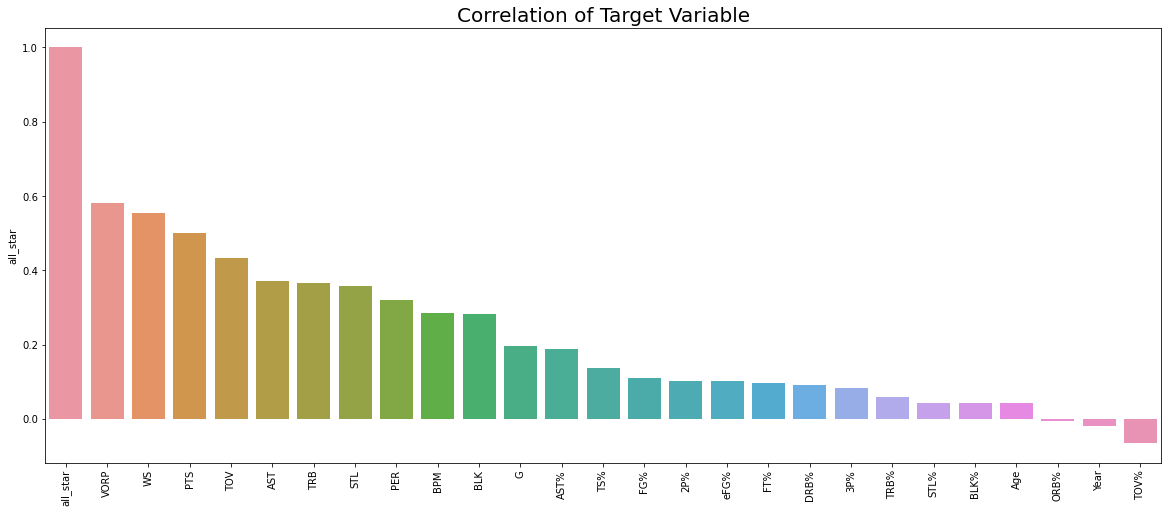

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x= player_data.corr()['all_star'].sort_values(ascending = False).index,y= player_data.corr()['all_star'].sort_values(ascending = False))
plt.title('Correlation of Target Variable',size=20)
plt.xticks(rotation=90);

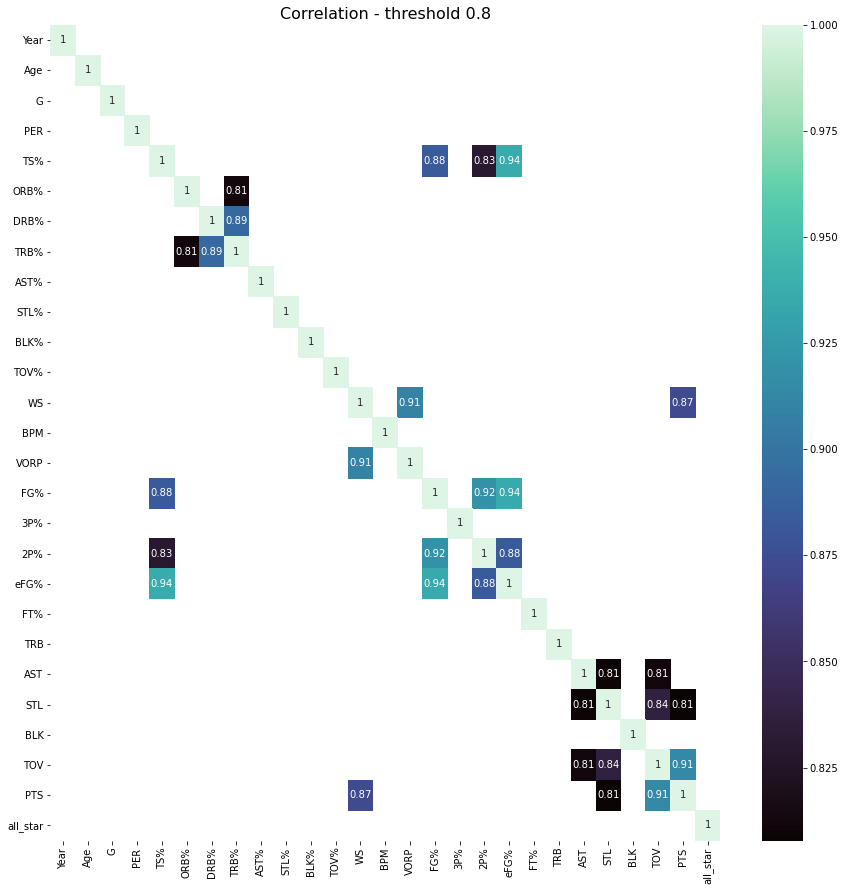

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(player_data.corr()[player_data.corr() > 0.80],cmap='mako',annot=True)
plt.title('Correlation - threshold 0.8',size=16);

#### Graph the distibution of the 'Age' feature

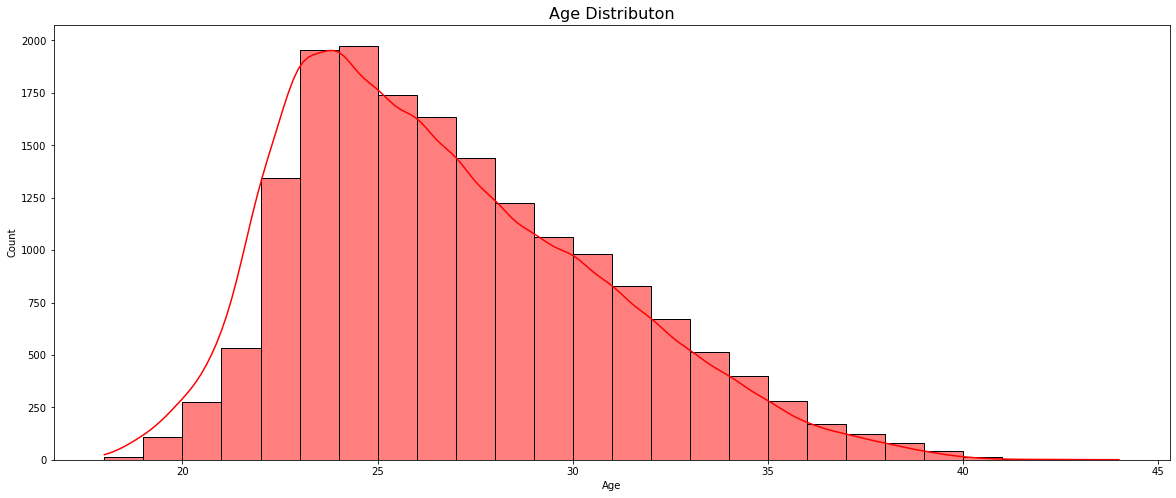

In [36]:
plt.figure(figsize=(20,8))
sns.histplot(x=player_data['Age'],kde=True,bins=50,binwidth=1, color='red')
plt.title('Age Distributon',size=16);

## Part 3: Classification

### Build a classifier that predicts whether or not a player makes an All-Star team based on their stats for that season

It is important to say that regarding our case, we have an unbalanced classification problem since not all the players can be all star in the same season.

In [37]:
#Showing the amount of players, in %, that were all star after 1980
player_data['all_star'].value_counts()/len(player_data)*100

0    95.346967
1     4.653033
Name: all_star, dtype: float64

Only 4.6% of the players playing since 1980 were in the all star team which confirms the unbalanced classification we are facing.

First step is do deal with the missing values and replace them with 0.

In [38]:
player_data.isnull().sum()

Year          0
Player        0
Pos           0
Age           0
Tm            0
G             0
PER           5
TS%          76
ORB%          5
DRB%          5
TRB%          5
AST%          5
STL%          5
BLK%          5
TOV%         61
WS            0
BPM           0
VORP          0
FG%          88
3P%           0
2P%         116
eFG%         88
FT%         724
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PTS           0
all_star      0
dtype: int64

Since these missing values are negligible, we can replace them by 0.

In [39]:
player_data=player_data.fillna(0)

In [40]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17408 entries, 0 to 17407
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      17408 non-null  float64
 1   Player    17408 non-null  object 
 2   Pos       17408 non-null  object 
 3   Age       17408 non-null  float64
 4   Tm        17408 non-null  object 
 5   G         17408 non-null  float64
 6   PER       17408 non-null  float64
 7   TS%       17408 non-null  float64
 8   ORB%      17408 non-null  float64
 9   DRB%      17408 non-null  float64
 10  TRB%      17408 non-null  float64
 11  AST%      17408 non-null  float64
 12  STL%      17408 non-null  float64
 13  BLK%      17408 non-null  float64
 14  TOV%      17408 non-null  float64
 15  WS        17408 non-null  float64
 16  BPM       17408 non-null  float64
 17  VORP      17408 non-null  float64
 18  FG%       17408 non-null  float64
 19  3P%       17408 non-null  float64
 20  2P%       17408 non-null  fl

In [41]:
player_data['Player'].count()

17408

In [42]:
#Defining our explanatory and target variables and spliting the data
X = pd.get_dummies(player_data.drop(['Year','Player','all_star'],axis=1))
y = player_data['all_star']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

In [43]:
print("Train feature size: {}".format(X_train.shape))
print("Train target size: {}".format(y_train.shape))
print("Test feature size: {}".format(X_test.shape))
print("Test target size: {}".format(y_test.shape))

Train feature size: (12185, 81)
Train target size: (12185,)
Test feature size: (5223, 81)
Test target size: (5223,)


Given the unbalanced nature of the target variable, we will use 5 methods to determine a good model:
1) Random Forest Classifier

2) Adaboost

3) Gradient Boosting

4) Linear Regression

5) SVM


## Random Forest Classifier

In [44]:
classifier = RandomForestClassifier(n_estimators=10000,max_features="auto",bootstrap=True, oob_score=True, random_state=48, criterion = 'entropy')
classifier.fit(X_train, y_train)
classifierRF= regressor.predict(X_test)

The accuracy is: 0.9740


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


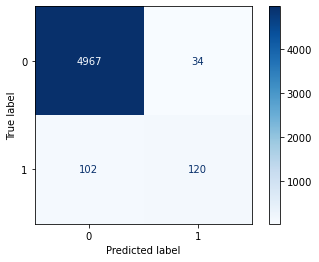

In [45]:
print("The accuracy is: {0:.4f}".format(accuracy_score(y_test,classifier.predict(X_test))))
plot_confusion_matrix(classifier, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [46]:
print(f'ROC_AUC score is {roc_auc_score(y_test,classifierRF)}')
print(classification_report(y_test,classifierRF))

ROC_AUC score is 0.7668709501342975
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5001
           1       0.78      0.54      0.64       222

    accuracy                           0.97      5223
   macro avg       0.88      0.77      0.81      5223
weighted avg       0.97      0.97      0.97      5223



## Adaboost

In [47]:
classifier1 = AdaBoostClassifier(n_estimators=10000, learning_rate=1,algorithm='SAMME.R')
classifier1.fit(X_train, y_train)
classifierADA= classifier1.predict(X_test)

The accuracy is: 0.9673


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


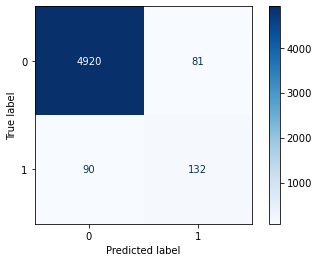

In [48]:
print("The accuracy is: {0:.4f}".format(accuracy_score(y_test,classifier1.predict(X_test))))
plot_confusion_matrix(classifier1, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [49]:
print(f'ROC_AUC score is {roc_auc_score(y_test,classifierADA)}')
print(classification_report(y_test,classifierADA))

ROC_AUC score is 0.7891989169733621
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5001
           1       0.62      0.59      0.61       222

    accuracy                           0.97      5223
   macro avg       0.80      0.79      0.79      5223
weighted avg       0.97      0.97      0.97      5223



## GradientBoosting

In [50]:
classifier2 = GradientBoostingClassifier(n_estimators=10000, learning_rate=1.0, max_depth=1, random_state=0)
classifier2.fit(X_train, y_train)
classifierGB=classifier2.predict(X_test)

The accuracy is: 0.9575


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


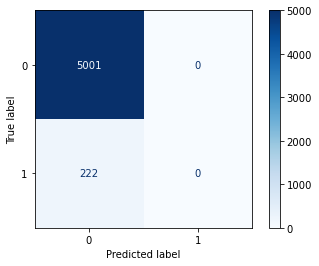

In [51]:
print("The accuracy is: {0:.4f}".format(accuracy_score(y_test,classifier2.predict(X_test))))
plot_confusion_matrix(classifier2, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [52]:
print(f'ROC_AUC score is {roc_auc_score(y_test,classifierGB)}')
print(classification_report(y_test,classifierGB))

ROC_AUC score is 0.5
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5001
           1       0.00      0.00      0.00       222

    accuracy                           0.96      5223
   macro avg       0.48      0.50      0.49      5223
weighted avg       0.92      0.96      0.94      5223



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear Regression

In [63]:
classifier3 = LogisticRegression(random_state=70, max_iter=100000, class_weight='balanced')
classifier3.fit(X_train,y_train)
classiferLR = linear.predict(X_test)

The accuracy is: 0.9391


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


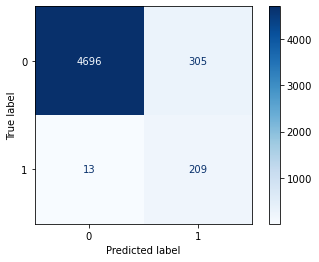

In [64]:
print("The accuracy is: {0:.4f}".format(accuracy_score(y_test,classifier3.predict(X_test))))
plot_confusion_matrix(classifier3, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [65]:
print(f'ROC_AUC score is {roc_auc_score(y_test,classiferLR)}')
print(classification_report(y_test,classiferLR))

ROC_AUC score is 0.7908458848770786
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5001
           1       0.76      0.59      0.66       222

    accuracy                           0.97      5223
   macro avg       0.87      0.79      0.83      5223
weighted avg       0.97      0.97      0.97      5223



## SVM

In [81]:
classifier4 = svm.SVC(kernel='linear',class_weight='balanced')
classifier4.fit(X_train,y_train)
classifierSVM = classifier4.predict(X_test)

The accuracy is: 0.9179


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


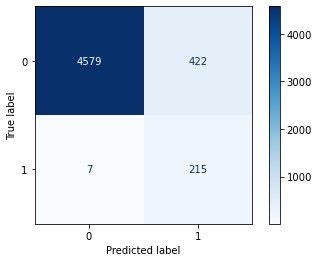

In [84]:
print("The accuracy is: {0:.4f}".format(accuracy_score(y_test,classifier4.predict(X_test))))
plot_confusion_matrix(classifier4, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [87]:
print(f'ROC_AUC score is {roc_auc_score(y_test,classifierSVM)}')
print(classification_report(y_test,classifierSVM))

ROC_AUC score is 0.9420426725465718
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5001
           1       0.34      0.97      0.50       222

    accuracy                           0.92      5223
   macro avg       0.67      0.94      0.73      5223
weighted avg       0.97      0.92      0.94      5223



## Predicting All Star team

In [88]:
team_predicted = classifier4.predict(X)
player_data['all_star_prediction']= list(team_predicted)
player_data

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star,all_star_prediction
0,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0,0,0
1,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0,0,0
2,1980.0,Larry Bird,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0,1,1
3,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0,0,0
4,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17403,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0,0,0
17404,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0,0,0
17405,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0,0,0
17406,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0,0,0


In [ ]:
# team_predicted = classifier3.predict(X)
# player_data['all_star_prediction']= list(team_predicted)
# player_data

## Conclusion:
Using 5 different models, we have an accuracy going from 92% to 98%, but with recall and F1 score not that good enough going from 54% to 97%, only for the SVM approach.
As we can the results, the performance are somehow pretty similar in terms of of accuray but not that close regarding the recall. 
It is important to say that because of the unbalanced distribution, we can notice that our models are better are predicting which player will not be in the all star team than the opposite.
    But regarding the recall, we can notice that for our SVM model, when playing withe feature and having a balanced class weight, our recall is the best one yet. But it really depends on the objective required so we can adjust the feature engineering and get better/more accurate results. 

So I tried to use SVM and LR to predict the players that would be part of the all star team, since these 2 models still have better performance that the others.




